In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path='/content/drive/Shareddrives/Deep Learning/Data/Final_file.csv'
df=pd.read_csv(path)

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


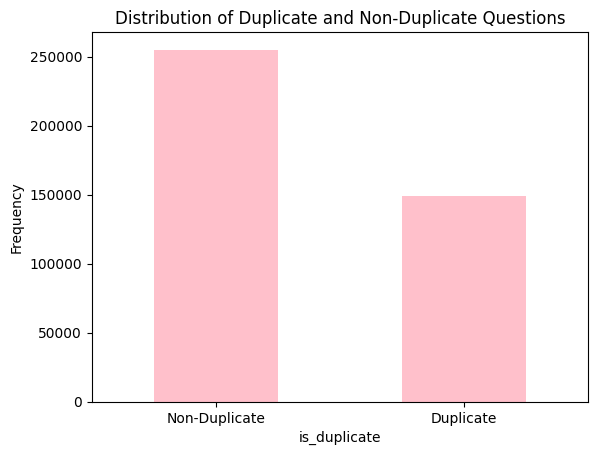

In [6]:
import matplotlib.pyplot as plt

# Display value counts of 'is_duplicate'
print(df['is_duplicate'].value_counts())

# Display percentage distribution of 'is_duplicate'
print((df['is_duplicate'].value_counts() / df['is_duplicate'].count()) * 100)

# Plot bar chart with pink color
df['is_duplicate'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribution of Duplicate and Non-Duplicate Questions')
plt.xlabel('is_duplicate')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Duplicate', 'Duplicate'], rotation=0)
plt.show()

Number of unique questions 537933
Number of questions getting repeated 111780


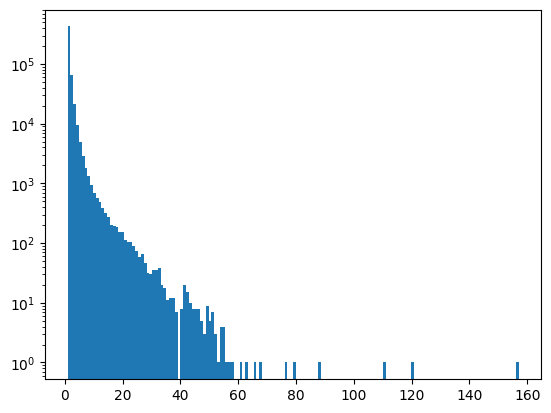

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [8]:
import numpy as np
import pandas as pd
qids = pd.Series(list(df['qid1']) + list(df['qid2'])) #Creating a dataframe that contains the question id of both quid1 and quid2
unique_qs = len(np.unique(qids))  #Numpy array to filter down all qniue elements
qs_morethan_onetime = np.sum(qids.value_counts() > 1)   # Counts any question that have been repeated more than one time
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#len(set(list(df['qid1'])+list(df['qid2'])))


print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,round(qs_morethan_onetime/unique_qs*100,2)))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) # Taking the frequency of all question and printing the max of them

q_vals=qids.value_counts()
print(q_vals)

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.78%)

Max number of times a single question is repeated: 157

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Name: count, Length: 537933, dtype: int64


##Questions with qid (2559 ,30182 4044) are some the question that are repeated multiple times

In [9]:
# Most frequently asked questions

print(df.loc[df['qid1']==2559]['question1'].head(1).values)
print('='*50)
print(" "*50)
print(df.loc[df['qid1']==30182]['question1'].head(1).values)
print('='*50)
print(" "*50)
print(df.loc[df['qid1']==4044]['question1'].head(1).values)

['What are the best ways to lose weight?']
                                                  
['How is borderline personality disorder (BPD) treated?']
                                                  
['How can I lose weight quickly?']


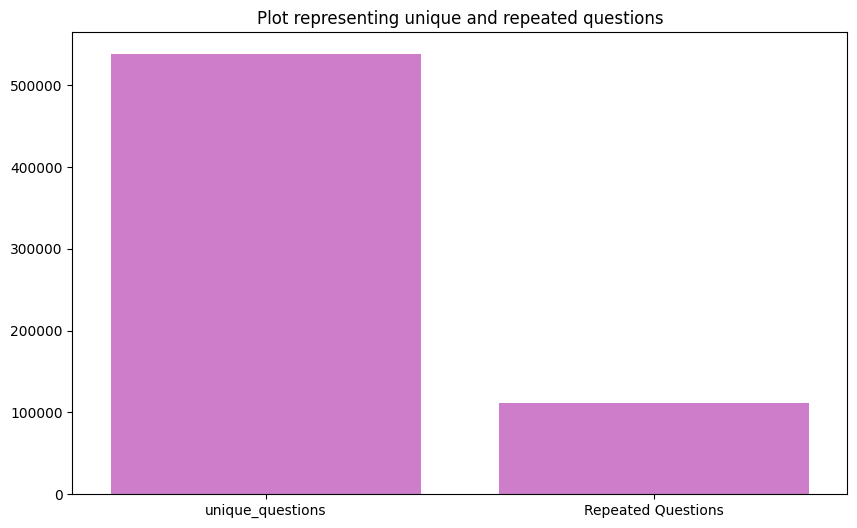

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define x and y values
x = ["unique_questions", "Repeated Questions"]
y = [unique_qs, qs_morethan_onetime]

# Plot bar chart with lilac color
plt.figure(figsize=(10, 6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x=x, y=y, color='orchid')  # Using the 'pastel' palette for a lilac-like color
plt.show()

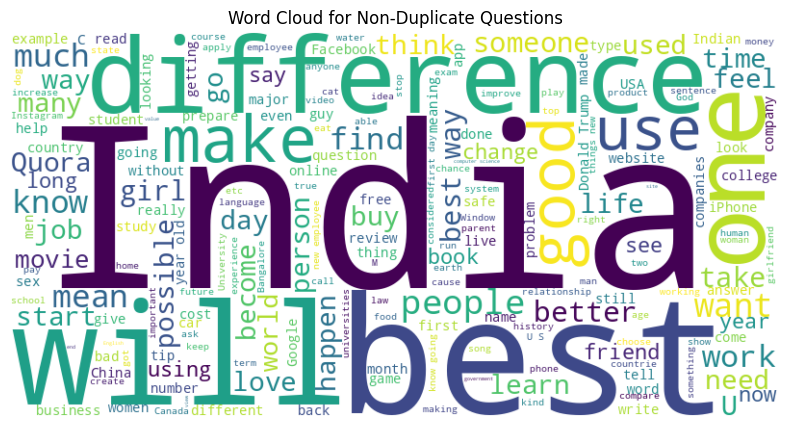

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Now you can use this function to plot word clouds
non_duplicate_text = ' '.join(df[df['is_duplicate'] == 0]['question1'].astype(str).tolist() +
                              df[df['is_duplicate'] == 0]['question2'].astype(str).tolist())
plot_word_cloud(non_duplicate_text, 'Word Cloud for Non-Duplicate Questions')


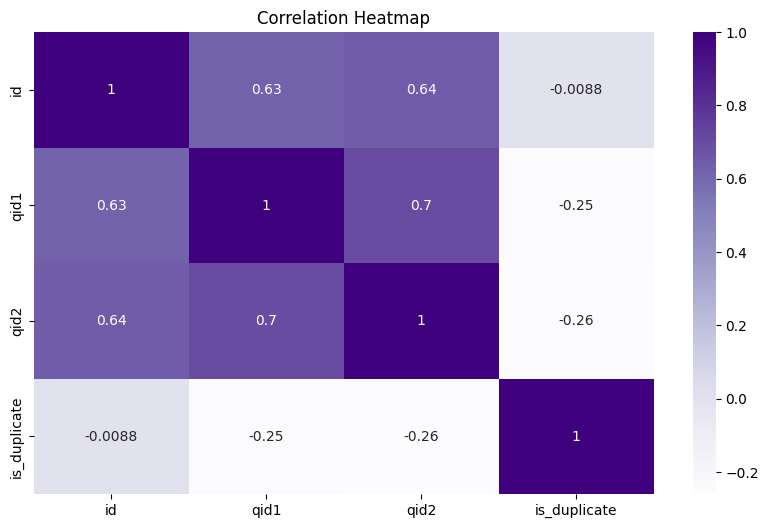

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame containing numerical and non-numerical columns

# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation heatmap with purple hue
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Purples')
plt.title('Correlation Heatmap')
plt.show()



#Data Preprocessing

In [ ]:
#Checking the missing values
missing_values = df.isnull().sum()
print(missing_values)

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


In [ ]:
#Removing null values
df = df.dropna()

In [ ]:
# After removing null values
missing_values = df.isnull().sum()
print(missing_values)


id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


In [ ]:
#Checking for duplicates

duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


In [ ]:
# Check if 'question1' and 'question2' are exactly the same in each row
duplicate_questions = df[df['question1'] == df['question2']]

# Calculate the total number of duplicate questions
total_duplicate_questions = len(duplicate_questions)
print("Total duplicate questions:", total_duplicate_questions)

# Remove the duplicate rows
df = df.drop(duplicate_questions.index)

Total duplicate questions: 0


In [ ]:
# Function to check if HTML tags are present in a string
import re
def check_for_html_tags(text):
    pattern = re.compile('<.*?>')
    return bool(re.search(pattern, text))

# Check if HTML tags are present in the 'question1' and 'question2' columns
html_tags_present_q1 = df['question1'].apply(check_for_html_tags)
html_tags_present_q2 = df['question2'].apply(check_for_html_tags)

# Print the results
print("HTML tags present in question1:", html_tags_present_q1.any())
print("HTML tags present in question2:", html_tags_present_q2.any())

HTML tags present in question1: True
HTML tags present in question2: True


In [ ]:
# Function to check if a string contains HTML tags
def check_for_html_tags(text):
    import re
    html_pattern = re.compile('<.*?>')
    return html_pattern.search(text) is not None

# Filter questions with HTML tags
questions_with_html_tags = df[df['question1'].apply(check_for_html_tags) | df['question2'].apply(check_for_html_tags)]

# Count the number of questions with HTML tags
num_questions_with_html_tags = len(questions_with_html_tags)

print("Number of questions with HTML tags:", num_questions_with_html_tags)


Number of questions with HTML tags: 71


In [ ]:
#Printing the questions with html tags

questions_with_html_tags = df[df['question1'].apply(check_for_html_tags) | df['question2'].apply(check_for_html_tags)]

print("Questions with HTML tags:")
for i, row in questions_with_html_tags.iterrows():
    print("Question1:", row['question1'])
    print("Question2:", row['question2'])
    print("-----------------------------------")

Questions with HTML tags:
Question1: Question- 30^30 - 29^30 whole divided by 30^29 + 29^29 is equal to x. Options- 1) x=1 2) x<1 3) x>1 4) cannot be determined?
Question2: Homework Question: I have this formula [10 = x - (1.29 + 4.99% of x)]. How do I calculate x?
-----------------------------------
Question1: Did you know <*/\*>1800*-251-*4919*-*<*/\*> Belkin router Technical support Belkin customer phone number?
Question2: Can any one tell me belkin router technical support Phone number?
-----------------------------------
Question1: “><img src=x onerror=prompt(1)>
Question2: "><img src=x onerror=prompt(0) >?
-----------------------------------
Question1: Is this the correct way to implement a stack using an arrayList<Integer> and a queue as an arrayList<Integer> in Java?
Question2: Which one is correct for declaring queue and stack in Java?
-----------------------------------
Question1: What is the function of <head> <title>Page Title</title> </head> in HTML?
Question2: How is the 

In [ ]:
import string
def check_for_punctuation(text):
    return any(char in string.punctuation for char in text)

# Check if punctuation characters are present in the 'question1' and 'question2' columns
punctuation_present_q1 = df['question1'].apply(check_for_punctuation)
punctuation_present_q2 = df['question2'].apply(check_for_punctuation)

# Print the results
print("Punctuation characters present in question1:", punctuation_present_q1.any())
print("Punctuation characters present in question2:", punctuation_present_q2.any())

Punctuation characters present in question1: True
Punctuation characters present in question2: True


In [ ]:
import nltk
nltk.download('stopwords')

import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
#     text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')

df['question1_cleaned'] = df.question1.apply(lambda x: clean_text(str(x)))
df['question2_cleaned'] = df.question1.apply(lambda x: clean_text(str(x)))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what be the step by step guide to invest in sh...,what be the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what be the story of kohinoor kohinoor diamond,what be the story of kohinoor kohinoor diamond
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can i increase the speed of my internet co...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why be i mentally very lonely how can i solve it,why be i mentally very lonely how can i solve it
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which one dissolve in water quikly sugar salt ...


In [ ]:
import re

def remove_emojis_and_return(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Define emoji pattern
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)

        # Find all emojis in the text
        emojis_removed = emoji_pattern.findall(text)

        # Remove emojis from the text
        text_cleaned = emoji_pattern.sub(r'', text)
    else:
        text_cleaned = text
        emojis_removed = []

    return text_cleaned, emojis_removed

# Apply the function to 'question1' and 'question2' columns
df['question1_cleaned'], df['question1_emojis'] = zip(*df['question1'].apply(remove_emojis_and_return))
df['question2_cleaned'], df['question2_emojis'] = zip(*df['question2'].apply(remove_emojis_and_return))


In [ ]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words

    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
df['question1_cleaned'] = df['question1_cleaned'].apply(preprocess)
df['question2_cleaned'] = df['question2_cleaned'].apply(preprocess)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned,question1_emojis,question2_emojis
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,[],[]
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,[],[]
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,[],[]
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,[],[]
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,[],[]


In [ ]:
df.drop(['question1', 'question2', 'question1_emojis', 'question2_emojis'], axis=1, inplace=True)
df.head(10)

,id,qid1,qid2,is_duplicate,question1_cleaned,question2_cleaned
0,0,1,2,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,3,4,0,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,2,5,6,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,7,8,0,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...
4,4,9,10,0,which one dissolve in water quikly sugar salt...,which fish would survive in salt water
5,5,11,12,1,astrology i am a capricorn sun cap moon and c...,i am a triple capricorn sun moon and ascenda...
6,6,13,14,0,should i buy tiago,what keeps childern active and far from phone ...
7,7,15,16,1,how can i be a good geologist,what should i do to be a great geologist
8,8,17,18,0,when do you use instead of,when do you use instead of and
9,9,19,20,0,motorola company can i hack my charter moto...,how do i hack motorola dcx3400 for free internet


In [ ]:
df = df.reindex(columns=['qid1', 'qid2', 'question1_cleaned', 'question2_cleaned','is_duplicate'])
df.head()

,qid1,qid2,question1_cleaned,question2_cleaned,is_duplicate
0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0
4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0
